In [107]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd
import math
import seaborn

In [108]:
# import the data with the correct column headings
column_names=['land_registry_id','sale_price','sale_date','postcode','property_type','new_build','tenure','address_1','address_2','address_3','address_4','address_5','address_6','address_7','internal_1','internal_2']

data_n1=pd.read_csv('/Users/drgk/code/data_science/nested_exercise/pp-subset.csv',header=None,names=column_names)

# Total number of properties = 8460
N_properties = len(data_n1)


In [109]:
# Basic Statistics of the complete dataset
mean_price_all_properties = np.mean(data_n1.sale_price)
median_price_all_properties = np.median(data_n1.sale_price)
lquart_price_all_properties = np.percentile(data_n1.sale_price,25)
uquart_price_all_properties = np.percentile(data_n1.sale_price,75)

print 'For all properties:'
print 'Upper Quartile = £%.0f'%uquart_price_all_properties
print 'Mean           = £%.0f'%mean_price_all_properties
print 'Median         = £%.0f'%median_price_all_properties
print 'Lower Quartile = £%.0f'%lquart_price_all_properties

For all properties:
Upper Quartile = £775000
Mean           = £672100
Median         = £499950
Lower Quartile = £350000


 ## Goal #1: Calculate mean, median and upper and lower quartile prices by month, property type and postcode sector

In [110]:
# Split data by month
print 'Earliest transaction: ' + data_n1.sale_date.min() # '2010-01-01 00:00'
print 'Latest transaction: ' + data_n1.sale_date.max() # '2016-11-25 00:00' i.e. 7 years x 12 months = 84 months

Earliest transaction: 2010-01-01 00:00
Latest transaction: 2016-11-25 00:00


In [111]:
# function to split the data by month
def split_data_by_month(data,N_months):
	mask_by_month_year={}
	all_years = pd.DatetimeIndex(data.sale_date).year
	all_months = pd.DatetimeIndex(data.sale_date).month
	month_summary = np.zeros([N_months,6]) # year, month, mean, median, upper and lower quartile
	k=0
	for year in np.arange(2010,2017):
		print year
		for month in np.arange(1,13):
			label=str(month)+"."+str(year)
			mask_by_month_year[label]=(all_years==year)&(all_months==month)
			month_summary[k,0]=year; month_summary[k,1]=month
			if len(data.sale_price[mask_by_month_year[label]]>0):
				month_summary[k,2]=np.mean(data.sale_price[mask_by_month_year[label]]); month_summary[k,3]=np.median(data.sale_price[mask_by_month_year[label]])
				month_summary[k,4]=np.percentile(data.sale_price[mask_by_month_year[label]],25); month_summary[k,5]=np.percentile(data.sale_price[mask_by_month_year[label]],75)
			k+=1
	return mask_by_month_year, month_summary

In [112]:
N_months=84
mask_by_month_year, month_summary = split_data_by_month(data_n1,N_months)

2010
2011
2012
2013
2014
2015
2016


In [113]:
# function to split the data by property type
property_types=['D','S','T','F']

def split_data_by_property_type(data):
	mask_property_types = {}
	for property_type in property_types:
		mask_property_types[property_type]=data.property_type==property_type
	return mask_property_types


In [114]:
mask_property_types = split_data_by_property_type(data_n1)

In [115]:
# Identify all existing postcode sectors in the data:
N=len(data_n1)
postcode_sectors=[]
full_postcode_sectors=[]
for i in np.arange(0,N):
# 	print data_n1.postcode[i]
	full_postcode=data_n1.postcode[i]
	try:
		split_postcode = full_postcode.split()
	except:
		continue
	postcode_sector=split_postcode[0]+" "+split_postcode[1][0]
	full_postcode_sectors.append(postcode_sector)
	if postcode_sector not in postcode_sectors:
		postcode_sectors.append(postcode_sector)
postcode_sectors.sort()
print postcode_sectors
# PRINT OUTPUT AND COMMENT

['N1 0', 'N1 1', 'N1 2', 'N1 3', 'N1 4', 'N1 5', 'N1 6', 'N1 7', 'N1 8', 'N1 9']


OK, it was probably obvious that these would be the N1 postcode sectors without going to all the trouble of finding them by iteration!
This is a scalable way of doing things however and could be implemented on datasets containing more than just the N1 postcode.

In [116]:
#function to split the data by postcode sector
def split_data_by_postcode_sector(data):
	mask_by_postcode_sector={}
	sale_prices_by_postcode_sector={}
	mean_price_by_postcode_sector=np.zeros(10)
	median_price_by_postcode_sector=np.zeros(10)
	lquart_price_by_postcode_sector=np.zeros(10)
	uquart_price_by_postcode_sector=np.zeros(10)
	k=0
	for sector in postcode_sectors:
		index_by_postcode_sector=[i for i,x in enumerate(full_postcode_sectors) if x==sector]
		mask_by_postcode_sector[sector]=np.zeros(N_properties,dtype=bool)
		mask_by_postcode_sector[sector][index_by_postcode_sector]=True
		sale_prices_by_postcode_sector[sector]=data.sale_price[mask_by_postcode_sector[sector]]
		mean_price_by_postcode_sector[k]=np.mean(sale_prices_by_postcode_sector[sector])
		median_price_by_postcode_sector[k]=np.median(sale_prices_by_postcode_sector[sector])
		lquart_price_by_postcode_sector[k]=np.percentile(sale_prices_by_postcode_sector[sector],25)
		uquart_price_by_postcode_sector[k]=np.percentile(sale_prices_by_postcode_sector[sector],75)
		k+=1
	return mask_by_postcode_sector, mean_price_by_postcode_sector, median_price_by_postcode_sector, lquart_price_by_postcode_sector, uquart_price_by_postcode_sector


In [117]:
mask_by_postcode_sector, mean_price_by_postcode_sector, median_price_by_postcode_sector, lquart_price_by_postcode_sector, uquart_price_by_postcode_sector = split_data_by_postcode_sector(data_n1)

In [118]:
# make labels for plot axes
tick_labels=[]
for year in np.arange(2010,2017):
	for month in ['Jan','Jul']:
		tick_labels.append(str(month)+" "+str(year))

Now let's make a simple plot showing the mean, median and range between the lower and upper quartiles as a function of time, for all the data combined:

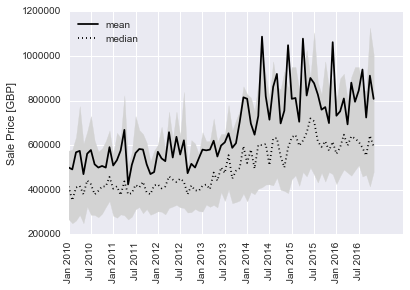

In [119]:
# let's plot mean, median, lquart and uquart per month
plt.figure()
plt.plot(month_summary[:-1,2],'k-',label='mean')
plt.plot(month_summary[:-1,3],'k:',label='median')
plt.fill_between(np.arange(0,83),month_summary[:-1,4],month_summary[:-1,5],color='lightgrey')
plt.xticks(np.arange(0,84,6),tick_labels,rotation='vertical')
plt.ylabel('Sale Price [GBP]')
plt.legend(loc=2,frameon=False)
plt.show()


Already a few properties of the data have become clear:
- The mean is pushed significantly higher than the median due to a small number of very high sale prices.
- The mean is also a lot more volatile than the median, as is the upper quartile.
Now let's try to look at the same data but split by property type. Let's concentrate on the median, where the underlying trend should be most readily apparent.

In [120]:
# Now extract out the plot median per month for each proprty type
median_per_month_per_property_type=np.zeros([84,4])
l=0
for property_type in property_types:
	k=0
	for year in np.arange(2010,2017):
		for month in np.arange(1,13):
			label=str(month)+"."+str(year)
			median_per_month_per_property_type[k,l]=np.median(data_n1.sale_price[mask_property_types[property_type]&mask_by_month_year[label]])
			k+=1
	l+=1

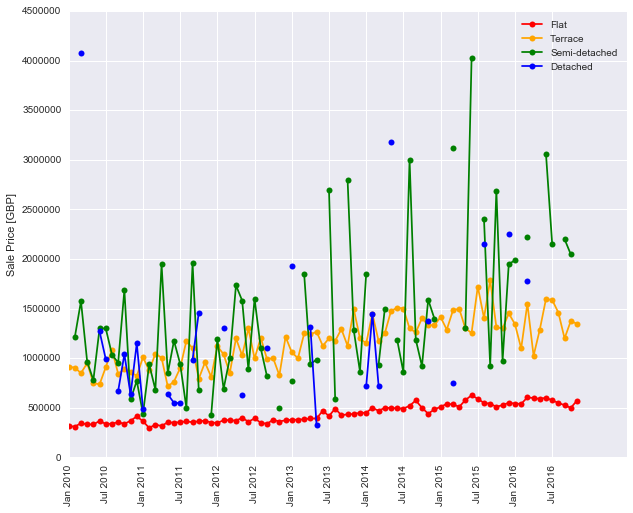

In [121]:
# Plot the median for each property type over time. 
ms=6
plt.figure(figsize=(10,8))
plt.plot(median_per_month_per_property_type[:-1,3],color='red',marker='o',markersize=ms,label='Flat')
plt.plot(median_per_month_per_property_type[:-1,2],color='orange',linestyle='-',marker='o',markersize=ms,label='Terrace')
plt.plot(median_per_month_per_property_type[:-1,1],color='green',marker='o',markersize=ms,label='Semi-detached')
plt.plot(median_per_month_per_property_type[:-1,0],color='blue',marker='o',markersize=ms,label='Detached')
plt.legend(loc=0,frameon=False)
plt.xticks(np.arange(0,84,6),tick_labels,rotation='vertical')
plt.ylabel('Sale Price [GBP]')
plt.show()


Now we're beginnging to see a bit more structure in the dataset. As we might expect, flats have the lowest sale price but are also the most commonly sold properties by a long margin. Terraces are also common, more expensive and somewhat more variable in price.

Semi-detached and detached houses are more expensive on average and significantly more variable in price. There are many months in which no semi- or detached houses are sold, something to bear in mind later on.

Let's summarise the data for each property type:

In [122]:
property_type_summary = np.zeros([4,4]) # for each property type: mean, median, lquart, uquart
k=0
for property_type in property_types:
    property_type_summary[k,0] = np.mean(data_n1.sale_price[mask_property_types[property_type]])
    property_type_summary[k,1] = np.median(data_n1.sale_price[mask_property_types[property_type]])
    property_type_summary[k,2] = np.percentile(data_n1.sale_price[mask_property_types[property_type]],25)
    property_type_summary[k,3] = np.percentile(data_n1.sale_price[mask_property_types[property_type]],75)
    k+=1


In [123]:
from tabulate import tabulate
from IPython.display import HTML
# HTML(tabulate(property_type_summary, headers= ['mean', 'median', 'lower quartile','upper quartile'], floatfmt='.0f', tablefmt='html'))

In [124]:
import locale
locale.setlocale( locale.LC_ALL, '' )

table=[]
k=0
for property_type in property_types:
    table_row = [property_type,'GBP {:,.0f}'.format(property_type_summary[k,0]),'GBP {:,.0f}'.format(property_type_summary[k,1]),'GBP {:,.0f}'.format(property_type_summary[k,2]),'GBP {:,.0f}'.format(property_type_summary[k,3])]
    table.append(table_row)
    k+=1
    
# table = [["Sun",696000,1989100000],["Earth",6371,5973.6],
# ...          ["Moon",1737,73.5],["Mars",3390,641.85]]
print tabulate(table, floatfmt='.0f',headers= ['Property Type','mean', 'median', 'lower quartile','upper quartile'])

Property Type    mean           median         lower quartile    upper quartile
---------------  -------------  -------------  ----------------  ----------------
D                GBP 1,295,540  GBP 1,100,000  GBP 703,750       GBP 1,465,000
S                GBP 1,389,560  GBP 1,150,000  GBP 760,000       GBP 1,850,000
T                GBP 1,259,865  GBP 1,157,500  GBP 832,250       GBP 1,550,000
F                GBP 492,460    GBP 440,000    GBP 327,000       GBP 600,000


In [125]:
# Now separate out the monthly info by postcode sector:
mean_per_month_per_postcode_sector=np.zeros([84,10])
median_per_month_per_postcode_sector=np.zeros([84,10])
lquart_per_month_per_postcode_sector=np.zeros([84,10])
uquart_per_month_per_postcode_sector=np.zeros([84,10])
l=0
for sector in postcode_sectors:
	k=0
	for year in np.arange(2010,2017):
		for month in np.arange(1,13):
			label=str(month)+"."+str(year)
			if len(data_n1.sale_price[mask_by_postcode_sector[sector]&mask_by_month_year[label]]>0):
				mean_per_month_per_postcode_sector[k,l]=np.mean(data_n1.sale_price[mask_by_postcode_sector[sector]&mask_by_month_year[label]])
				median_per_month_per_postcode_sector[k,l]=np.median(data_n1.sale_price[mask_by_postcode_sector[sector]&mask_by_month_year[label]])
				lquart_per_month_per_postcode_sector[k,l]=np.percentile(data_n1.sale_price[mask_by_postcode_sector[sector]&mask_by_month_year[label]],25)
				uquart_per_month_per_postcode_sector[k,l]=np.percentile(data_n1.sale_price[mask_by_postcode_sector[sector]&mask_by_month_year[label]],75)
			k+=1
	l+=1

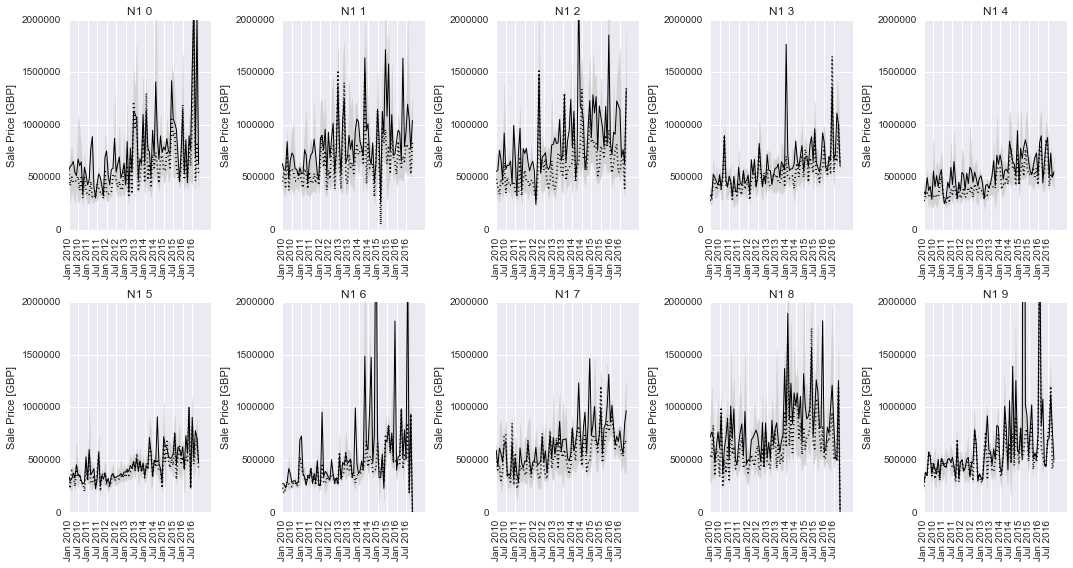

In [126]:
# and plot... 
plt.figure(figsize=(15,8))
for isector in np.arange(0,10):
	plt.subplot(2,5,isector+1)
	plt.plot(mean_per_month_per_postcode_sector[:-1,isector],'k-',linewidth=1)
	plt.plot(median_per_month_per_postcode_sector[:-1,isector],'k:')
	plt.fill_between(np.arange(0,83),lquart_per_month_per_postcode_sector[:-1,isector],uquart_per_month_per_postcode_sector[:-1,isector],color='lightgrey')
	plt.xticks(np.arange(0,84,6),tick_labels,rotation='vertical')
	plt.ylabel('Sale Price [GBP]')
	plt.title(postcode_sectors[isector])
	plt.ylim([0,2e6])
plt.tight_layout()
plt.show()

Let's summarise the statistics (for all property) by postcode sector:

In [127]:
statistics_table_per_postcode_sector = []
k=0
for sector in postcode_sectors:
    mean_for_postcode_sector=np.mean(data_n1.sale_price[mask_by_postcode_sector[sector]])
    median_for_postcode_sector=np.median(data_n1.sale_price[mask_by_postcode_sector[sector]])
    lquart_for_postcode_sector=np.percentile(data_n1.sale_price[mask_by_postcode_sector[sector]],25)
    uquart_for_postcode_sector=np.percentile(data_n1.sale_price[mask_by_postcode_sector[sector]],75)
    table_row = [sector,'GBP {:,.0f}'.format(mean_for_postcode_sector),'GBP {:,.0f}'.format(median_for_postcode_sector),'GBP {:,.0f}'.format(mean_for_postcode_sector),'GBP {:,.0f}'.format(mean_for_postcode_sector)]
    statistics_table_per_postcode_sector.append(table_row)
    k+=1
print tabulate(statistics_table_per_postcode_sector, floatfmt='.0f',headers= ['Postcode Sector','mean', 'median', 'lower quartile','upper quartile'])       

Postcode Sector    mean         median       lower quartile    upper quartile
-----------------  -----------  -----------  ----------------  ----------------
N1 0               GBP 708,629  GBP 496,000  GBP 708,629       GBP 708,629
N1 1               GBP 794,352  GBP 575,000  GBP 794,352       GBP 794,352
N1 2               GBP 829,670  GBP 550,000  GBP 829,670       GBP 829,670
N1 3               GBP 597,501  GBP 499,950  GBP 597,501       GBP 597,501
N1 4               GBP 550,334  GBP 425,500  GBP 550,334       GBP 550,334
N1 5               GBP 443,979  GBP 385,000  GBP 443,979       GBP 443,979
N1 6               GBP 601,060  GBP 412,000  GBP 601,060       GBP 601,060
N1 7               GBP 663,809  GBP 570,000  GBP 663,809       GBP 663,809
N1 8               GBP 814,945  GBP 596,000  GBP 814,945       GBP 814,945
N1 9               GBP 674,417  GBP 500,000  GBP 674,417       GBP 674,417


Now we have an idea of some of the statistics of property, broken down by some relevant categories. We could use this setup to get right down to the granular level e.g. mean sale price for flats sold in October 2013 in N1 3 but I've left this level of detail in graph form for now.

## Goal #2: Use a regression algorithm of your choice to extrapolate the price trend for each property type and postcode sector for the next six months (Jan - Jun 2017 inclusive)


I'm going to use a v.simple linear regression from scikit-learn to get results out quickly. Time permitting I will come back and do something more sophisticated.

In [128]:
from sklearn.linear_model import LinearRegression


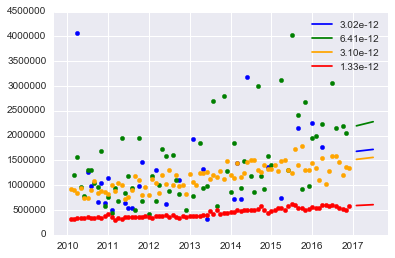

In [129]:
X = pd.date_range('2010-01-01 00:00','2016-12-31 00:00',freq='M')  # put your dates in here
X_predict = pd.date_range('2017-01-01 00:00','2017-07-01 00:00',freq='M')  # put the dates of which you want to predict kwh here
model = LinearRegression()
y_predict=np.zeros([len(X_predict),4])
plt.figure()
color_list=['blue','green','orange','red']
for iproperty_type in np.arange(0,4):
	y = np.squeeze(median_per_month_per_property_type[:,iproperty_type])  # put your data in here
	iuse = np.squeeze(np.where(np.isnan(y)==False))

	model.fit(X[iuse, np.newaxis], y[iuse])

	y_predict[:,iproperty_type] = model.predict(X_predict[:, np.newaxis].view('i8'))

	plt.scatter(X, y,color=color_list[iproperty_type])
	plt.plot(X_predict, y_predict[:,iproperty_type],color=color_list[iproperty_type],label='%.2e'%model.coef_);
plt.legend(loc=0,frameon=False)
plt.show()

Summary of percentage change over the next six months:

In [130]:
percentage_change_by_property_type = 100*(y_predict[-1,:]-y_predict[0,:])/y_predict[0,:]

table_percentage_change_by_property_type = []
k=0
property_types_full=['Detached','Semi-detached','Terrace','Flat']
for property_type in property_types_full:
    table_row = [property_type,np.round(percentage_change_by_property_type[k],2)]
    table_percentage_change_by_property_type.append(table_row)
    k+=1
print tabulate(table_percentage_change_by_property_type, floatfmt='.2f',headers= ['Property Type','% Change'])       

Property Type      % Change
---------------  ----------
Detached               2.32
Semi-detached          3.78
Terrace                2.64
Flat                   2.91


Now I will look at the predictions per sector (for all property types in that sector):

(0, 10)


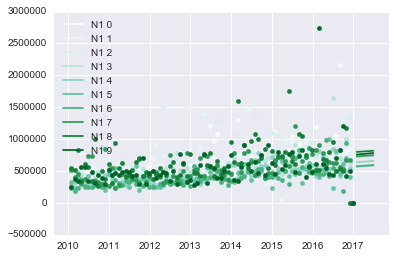

In [131]:
import matplotlib.colors as colors
import matplotlib.cm as cmx
use_cmap = cm = plt.get_cmap('BuGn') 
cNorm  = colors.Normalize(vmin=0, vmax=10)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=use_cmap)
print scalarMap.get_clim()

# Now fit that simple model to each postcode sector (all properties)
y_predict_sectors=np.zeros([len(X_predict),10])
for isector in np.arange(0,10):
	colorVal = scalarMap.to_rgba(isector)
	y = np.squeeze(median_per_month_per_postcode_sector[:,isector])  
	model.fit(X[:-1, np.newaxis], y[:-1])
	y_predict_sectors[:,isector] = model.predict(X_predict[:, np.newaxis].view('i8'))
	plt.scatter(X, y,color=colorVal)
	plt.plot(X_predict, y_predict_sectors[:,isector],color=colorVal,label=postcode_sectors[isector]);
plt.legend(loc=2,frameon=False)
plt.show()

percentage_change_by_sector = 100*(y_predict_sectors[-1,:]-y_predict_sectors[0,:])/y_predict_sectors[0,:]

In [132]:
table_percentage_change_by_sector = []
k=0
for sector in postcode_sectors:
    table_row = [sector,'GBP {:,.0f}'.format(y_predict_sectors[0,k]),'GBP {:,.0f}'.format(y_predict_sectors[-1,k]),np.round(percentage_change_by_sector[k],2)]
    table_percentage_change_by_sector.append(table_row)
    k+=1
print tabulate(table_percentage_change_by_sector, floatfmt='.2f',headers= ['Sector','Median Jan 2017','Median Jun 2017','% Change'])       

Sector    Median Jan 2017    Median Jun 2017      % Change
--------  -----------------  -----------------  ----------
N1 0      GBP 838,568        GBP 867,743              3.48
N1 1      GBP 785,132        GBP 800,636              1.97
N1 2      GBP 830,129        GBP 854,313              2.91
N1 3      GBP 714,215        GBP 734,863              2.89
N1 4      GBP 637,458        GBP 658,791              3.35
N1 5      GBP 569,104        GBP 586,253              3.01
N1 6      GBP 576,333        GBP 595,434              3.31
N1 7      GBP 729,241        GBP 749,242              2.74
N1 8      GBP 799,453        GBP 817,216              2.22
N1 9      GBP 758,536        GBP 782,646              3.18


Now we bring it all together, making a prediction for each property type within each sector:

In [133]:
# now fit the model to each property type and postcode sector individually
y_predict_property_type_sectors=np.zeros([len(X_predict),4,10])
k=0
for property_type in property_types:
	l=0
	for sector in postcode_sectors:
		median_per_month_per_postcode_sector_per_type=np.zeros(84)
		imonth=0
		for year in np.arange(2010,2017):
			for month in np.arange(1,13):
				label=str(month)+"."+str(year)
				median_per_month_per_postcode_sector_per_type[imonth]=np.median(data_n1.sale_price[mask_by_postcode_sector[sector]&mask_property_types[property_type]&mask_by_month_year[label]])
				imonth+=1
		y = np.squeeze(median_per_month_per_postcode_sector_per_type) 
		iuse = np.squeeze(np.where(np.isnan(y)==False))
		if np.shape(np.where(np.isnan(y)==False))[1]>4: # REQUIRE MINIMUM FOR PREDICTIONS TO BE AT ALL VALID
			model.fit(X[iuse, np.newaxis], y[iuse])
			y_predict_property_type_sectors[:,k,l] = model.predict(X_predict[:, np.newaxis].view('i8'))
		l+=1
	k+=1

percentage_change_by_property_type_and_sector=np.zeros([4,10])
for iproperty_type in np.arange(0,len(property_types)):
	for isector in np.arange(0,len(postcode_sectors)):
		percentage_change_by_property_type_and_sector[iproperty_type,isector] = 100*(y_predict_property_type_sectors[-1,iproperty_type,isector]-y_predict_property_type_sectors[0,iproperty_type,isector])/y_predict_property_type_sectors[0,iproperty_type,isector]


For clarity, I'm just going to write out the percentage change predicted for each property type/sector between January and June 2017

In [134]:
table_percentage_change_by_sector_and_type = []
k=0
for sector in postcode_sectors:
    table_row = [sector,np.round(percentage_change_by_property_type_and_sector[0,k],2),np.round(percentage_change_by_property_type_and_sector[1,k],2),np.round(percentage_change_by_property_type_and_sector[2,k],2),np.round(percentage_change_by_property_type_and_sector[3,k],2)]
    table_percentage_change_by_sector_and_type.append(table_row)
    k+=1
print tabulate(table_percentage_change_by_sector_and_type, floatfmt='.2f',headers= ['Sector','Detached','Semi-','Terrace','Flat'])       

Sector      Detached    Semi-    Terrace    Flat
--------  ----------  -------  ---------  ------
N1 0          nan        2.52       3.09    2.79
N1 1            2.59     5.43       2.16    2.17
N1 2           -1.10     1.77       2.87    3.03
N1 3          nan        3.60       3.21    2.82
N1 4          nan        3.02       2.28    3.40
N1 5          nan        4.68       3.35    2.67
N1 6          nan      nan          1.40    3.44
N1 7          nan        4.46       3.25    3.44
N1 8            2.58   -10.69       2.73    2.70
N1 9          nan      nan          3.96    2.73


Some of the categories had too few remaining entries to make a reliable prediction. Unsurprisingly this is mostly the case for detached houses. (NB - my criteria for a "sufficient" number of data points for a prediction, 5, was pretty arbitrary. This should be revisitied).

Nevertheless, we can see some interesting results. Terraces and Flats predict steady growth across all sectors, from a low of 1.4% for Terraces in N16 to a high of 3.96% for terraces in N19.

Detached and Semis, where there is data, post more extreme predicted changes - Semis in N11 growing by 5.43%. Some categories show predicted *falls* in sale price, notably Semis in N18 dropping by a whopping -10.69%. It is very possible that this is a statistical blip or forecasting error and should be investigated further.

## Extensions

There are lots of ways in which this work could be improved, including:
* More sophisticated prediction models, for example the AutoRegressive Integrated Moving Average (ARIMA) model.
* After initial exploration, I focused on forecasting the median sale price as it looked most stable. It might be financially very relevant to forecast the other statistics (mean, quartiles) as well, particularly as this would begin to provide a confidence interval for our predictions.
* Geo-spatial plotting of results to more easily see how these results map onto the socio-economic geography of the area.
* Further eyeballing of individual odd results like the predicted price dip for terraces in N1 8.